3000.0


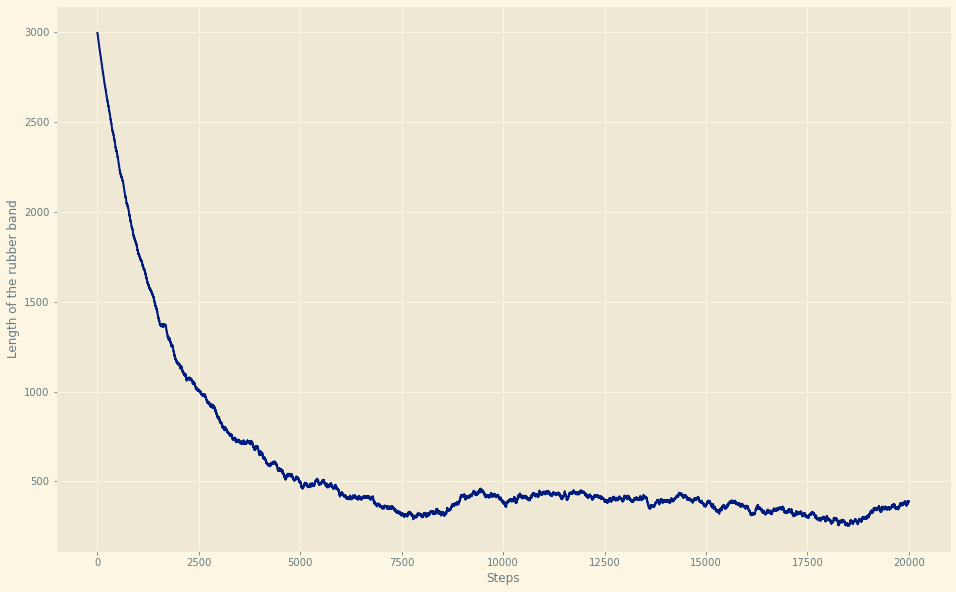

In [2]:
import numpy as np  ##importing libraries
import matplotlib.pyplot as plt
from matplotlib import style
style.use('Solarize_Light2')  ##i used to style so that i can make it as thumbnail of my bolgs
style.use('seaborn-dark-palette')

N = 3000  ##number of links
Links_array = -1*np.ones(N) ##all links are pointing downward
L = -2*np.sum((Links_array[(np.where(Links_array==-1))]))-N ###this will give us Length of rubber band -2*n_D-N,
#####(-2 because all sum will be negative inside the parenthesis) 
print(L)
L_array = [L]
T = 2  ##temperatue 
Beta = 1/(2.*T) ##beta

step = 20000  ##number of steps
Step_array = [0]  ##step array
for i in range (1,step):
    n = np.random.randint(0,N)  ##selecting random number
    link = Links_array[n] ##indexing selected link
    
    ##changing spin size according to metropolis algorithm 
    if(link==1):
        Links_array[n]  = -1*link
    else:
        del_E = 1
        if(np.random.uniform()<np.exp(-Beta*del_E)):
            Links_array[n]  = -1*link
    ###########################3
    
    ##updating length and steps
    L = -2*np.sum((Links_array[(np.where(Links_array==-1))]))-N
    L_array.append(L)
    Step_array.append(i)

plt.figure(figsize = (16,10))
plt.plot(Step_array,L_array)
plt.xlabel('Steps')
plt.ylabel('Length of the rubber band')
plt.show()    

<br>

Clearly length becomes steady with some fluctuation about mean, so we can now further calculate mean length for different temperature and verify $eq(14)$.

To verify this we have to do two things. First we have to run our simulation for a suitably long period of time until it has come to equilibrium at the temperature we are interested in.—this period is called the equilibration time and then we have to measure the quantity we are interested in over another suitably long period of time and average it!!

<br>
I will first create a Temperature array and for each value temperature value, calculate the mean length. 


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:42<00:00,  1.05s/it]


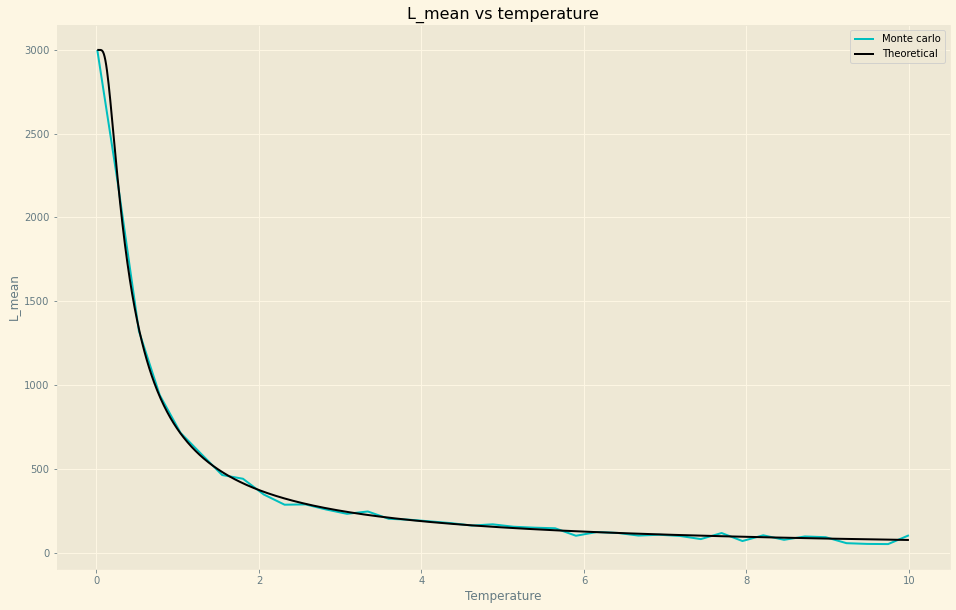

In [3]:
import numpy as  np
from tqdm import tqdm

N = 3000 ##number of links
Temp_array = np.linspace(0.01,10,40) ##temperature array
steps = 70000  ##steps
L_mean = []
for j in tqdm(range(int(len(Temp_array)))):
    

    Links_array = -1*np.ones(N)##all links are pointing downward
    L = -2*np.sum((Links_array[(np.where(Links_array==-1))]))-N ###this will give us Length of rubber band -2*n_D-N,

    Length_array = []
    T = Temp_array[j]
    Beta = 1.0/float(2*T)

    for i in range(steps):
        
        n = np.random.randint(0,N)  ##selecting random number
        link = Links_array[n] ##indexing selected link

        ##changing spin size according to metropolis algorithm 
        if(link==1):
            Links_array[n]  = -1*link
        else:
            del_E = 1
            if(np.random.uniform()<np.exp(-Beta*del_E)):
                Links_array[n]  = -1*link
        ###########################3
            
       
        if(i>=25000 and i%N==0): #storing length after 25000 step 
            
            L = -2*np.sum((Links_array[(np.where(Links_array==-1))]))-N
            Length_array.append(L)
    L_mean.append(np.mean(np.array(Length_array)))

###creating theoretical array
T_th = np.linspace(0.01,10,1000) 
L_th = N*np.tanh(1/(4.*T_th))

plt.figure(figsize = (16,10))
plt.plot(Temp_array,L_mean,label ="Monte carlo",color = 'c')
plt.plot(T_th,L_th,label = "Theoretical",color = 'k')
plt.xlabel("Temperature")
plt.ylabel("L_mean")
plt.title("L_mean vs temperature")
plt.legend()
plt.show()

<br>
Clearly once again Monte Carlo method is a savior for us and once again I want to mention-

**One must not stop a stochastic calculation simply because the result is just right, nor one should continue to play because the result is not close enough to what we think the answer should be !! — Werner Krauth.**


## $Voila !!!$
